In [429]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
 
!pip install fancyimpute
from fancyimpute import KNN

import statistics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split,RandomizedSearchCV

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


%matplotlib inline
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

You should consider upgrading via the 'C:\Users\HP\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [430]:
Empdata=pd.read_excel('data.xls')

## Exploratory Data Analysis

In [431]:
Empdata.columns=Empdata.columns.str.replace('Work load Average/day ', "Work load Average per Day")
Empdata['Month of absence']= Empdata['Month of absence'].replace(0,np.nan)
Empdata= Empdata.drop(['ID'],axis=1)
Empdata["Work load Average per Day"]=Empdata["Work load Average per Day"].div(1000)
Empdata.columns=Empdata.columns.str.replace(' ','')

In [432]:
Empdata.isnull().sum()

Reasonforabsence                3
Monthofabsence                  4
Dayoftheweek                    0
Seasons                         0
Transportationexpense           7
DistancefromResidencetoWork     3
Servicetime                     3
Age                             3
WorkloadAverageperDay          10
Hittarget                       6
Disciplinaryfailure             6
Education                      10
Son                             6
Socialdrinker                   3
Socialsmoker                    4
Pet                             2
Weight                          1
Height                         14
Bodymassindex                  31
Absenteeismtimeinhours         22
dtype: int64

In [433]:
numerical=['Transportationexpense','DistancefromResidencetoWork','Servicetime','Age','WorkloadAverageperDay','Hittarget',
     'Weight','Height','Bodymassindex','Absenteeismtimeinhours']

categorical=['Reasonforabsence','Monthofabsence','Dayoftheweek','Seasons','Disciplinaryfailure','Education','Son',
     'Socialdrinker','Socialsmoker','Pet']

## Missing Value Analysis

In [434]:
values_missing=pd.DataFrame(Empdata.isnull().sum())
print(values_missing)
values_missing=values_missing.reset_index()
print(values_missing)
values_missing=values_missing.rename(columns= {'index': 'features', 0:'missing_percentage'})
print(values_missing)
values_missing['missing_percentage']=(values_missing['missing_percentage']/len(Empdata)*100)

                              0
Reasonforabsence              3
Monthofabsence                4
Dayoftheweek                  0
Seasons                       0
Transportationexpense         7
DistancefromResidencetoWork   3
Servicetime                   3
Age                           3
WorkloadAverageperDay        10
Hittarget                     6
Disciplinaryfailure           6
Education                    10
Son                           6
Socialdrinker                 3
Socialsmoker                  4
Pet                           2
Weight                        1
Height                       14
Bodymassindex                31
Absenteeismtimeinhours       22
                          index   0
0              Reasonforabsence   3
1                Monthofabsence   4
2                  Dayoftheweek   0
3                       Seasons   0
4         Transportationexpense   7
5   DistancefromResidencetoWork   3
6                   Servicetime   3
7                           Age   3
8   

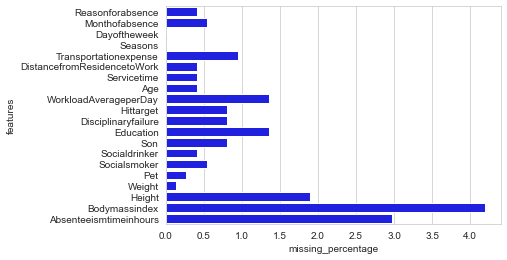

In [435]:
sns.barplot(x='missing_percentage',y='features',data=values_missing, color = 'blue')
plt.show()

In [436]:
values_missing

,features,missing_percentage
0,Reasonforabsence,0.405405
1,Monthofabsence,0.540541
2,Dayoftheweek,0.000000
3,Seasons,0.000000
4,Transportationexpense,0.945946
5,DistancefromResidencetoWork,0.405405
6,Servicetime,0.405405
7,Age,0.405405
8,WorkloadAverageperDay,1.351351
9,Hittarget,0.810811


In [437]:
Empdata.isnull().sum()

Reasonforabsence                3
Monthofabsence                  4
Dayoftheweek                    0
Seasons                         0
Transportationexpense           7
DistancefromResidencetoWork     3
Servicetime                     3
Age                             3
WorkloadAverageperDay          10
Hittarget                       6
Disciplinaryfailure             6
Education                      10
Son                             6
Socialdrinker                   3
Socialsmoker                    4
Pet                             2
Weight                          1
Height                         14
Bodymassindex                  31
Absenteeismtimeinhours         22
dtype: int64

In [438]:
# Missing Value analysis for categorical variables
for i in categorical:
    print(i)
    Empdata[i] = Empdata[i].fillna(Empdata[i].mode()[0])

Reasonforabsence
Monthofabsence
Dayoftheweek
Seasons
Disciplinaryfailure
Education
Son
Socialdrinker
Socialsmoker
Pet


In [439]:
Empdata.isnull().sum()

Reasonforabsence                0
Monthofabsence                  0
Dayoftheweek                    0
Seasons                         0
Transportationexpense           7
DistancefromResidencetoWork     3
Servicetime                     3
Age                             3
WorkloadAverageperDay          10
Hittarget                       6
Disciplinaryfailure             0
Education                       0
Son                             0
Socialdrinker                   0
Socialsmoker                    0
Pet                             0
Weight                          1
Height                         14
Bodymassindex                  31
Absenteeismtimeinhours         22
dtype: int64

In [440]:
# Missing Value analysis for numerical variables
Empdata=pd.DataFrame(KNN(k=3).fit_transform(Empdata),columns=Empdata.columns)

Imputing row 1/740 with 0 missing, elapsed time: 0.234
Imputing row 101/740 with 1 missing, elapsed time: 0.250
Imputing row 201/740 with 0 missing, elapsed time: 0.250
Imputing row 301/740 with 0 missing, elapsed time: 0.250
Imputing row 401/740 with 0 missing, elapsed time: 0.250
Imputing row 501/740 with 0 missing, elapsed time: 0.250
Imputing row 601/740 with 0 missing, elapsed time: 0.250
Imputing row 701/740 with 0 missing, elapsed time: 0.250


In [441]:
Empdata.isnull().sum()

Reasonforabsence               0
Monthofabsence                 0
Dayoftheweek                   0
Seasons                        0
Transportationexpense          0
DistancefromResidencetoWork    0
Servicetime                    0
Age                            0
WorkloadAverageperDay          0
Hittarget                      0
Disciplinaryfailure            0
Education                      0
Son                            0
Socialdrinker                  0
Socialsmoker                   0
Pet                            0
Weight                         0
Height                         0
Bodymassindex                  0
Absenteeismtimeinhours         0
dtype: int64

## Outlier Analysis

Transportationexpense


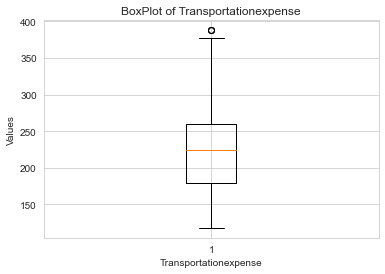

DistancefromResidencetoWork


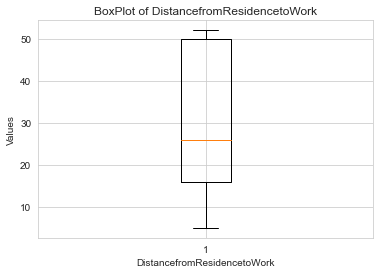

Servicetime


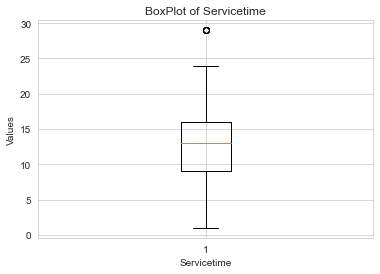

Age


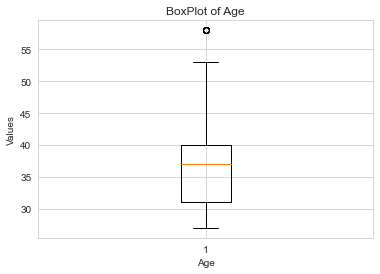

WorkloadAverageperDay


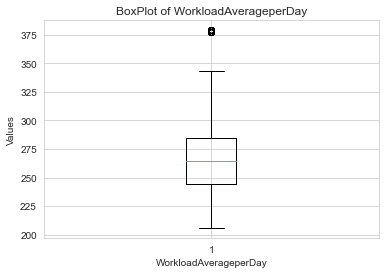

Hittarget


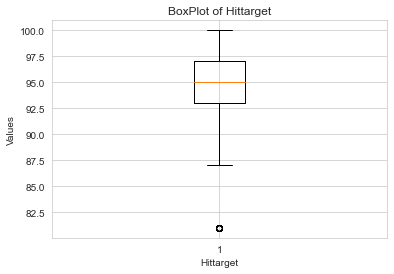

Weight


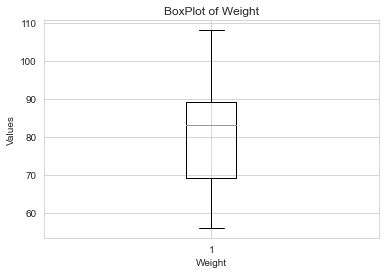

Height


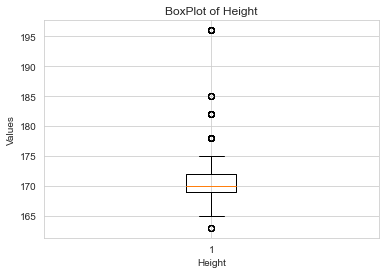

Bodymassindex


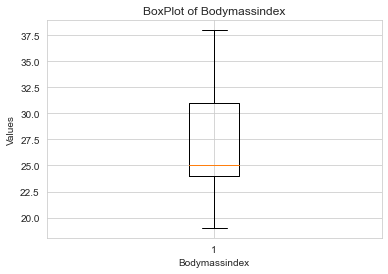

Absenteeismtimeinhours


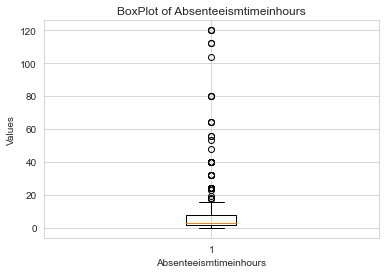

In [442]:
for i in numerical:
    print(i)
    plt.boxplot(Empdata[i])
    plt.xlabel(i)
    plt.ylabel('Values')
    plt.title("BoxPlot of "+i)
    plt.show()

In [443]:
for i in numerical:
    q75, q25 = np.percentile(Empdata[i], [75,25]) 
    iqr = q75 - q25
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    Empdata.loc[Empdata[i]< minimum,i] = np.nan
    Empdata.loc[Empdata[i]> maximum,i] = np.nan

In [444]:
Empdata.isna().sum()

Reasonforabsence                 0
Monthofabsence                   0
Dayoftheweek                     0
Seasons                          0
Transportationexpense            3
DistancefromResidencetoWork      0
Servicetime                      5
Age                              8
WorkloadAverageperDay           31
Hittarget                       19
Disciplinaryfailure              0
Education                        0
Son                              0
Socialdrinker                    0
Socialsmoker                     0
Pet                              0
Weight                           0
Height                         119
Bodymassindex                    0
Absenteeismtimeinhours          48
dtype: int64

In [445]:
Empdata = pd.DataFrame(KNN(k = 3).fit_transform(Empdata), columns = Empdata.columns)

Imputing row 1/740 with 0 missing, elapsed time: 0.266
Imputing row 101/740 with 1 missing, elapsed time: 0.266
Imputing row 201/740 with 0 missing, elapsed time: 0.266
Imputing row 301/740 with 0 missing, elapsed time: 0.281
Imputing row 401/740 with 0 missing, elapsed time: 0.281
Imputing row 501/740 with 0 missing, elapsed time: 0.281
Imputing row 601/740 with 0 missing, elapsed time: 0.281
Imputing row 701/740 with 0 missing, elapsed time: 0.281


## Distribution of the data

Reasonforabsence


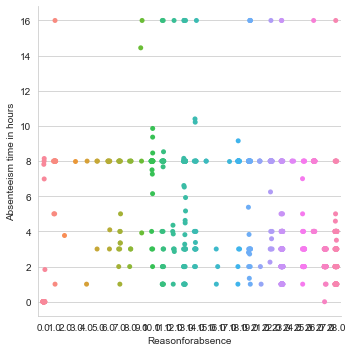

Monthofabsence


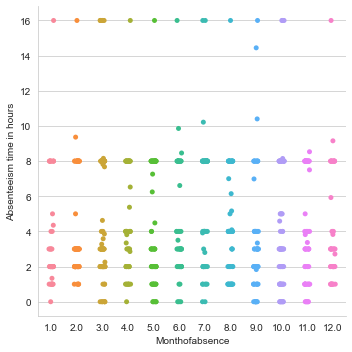

Dayoftheweek


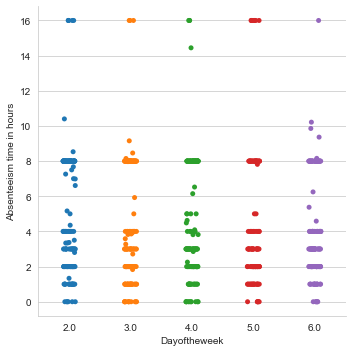

Seasons


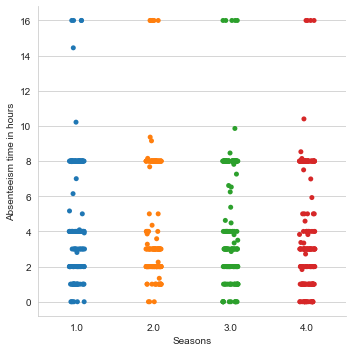

Disciplinaryfailure


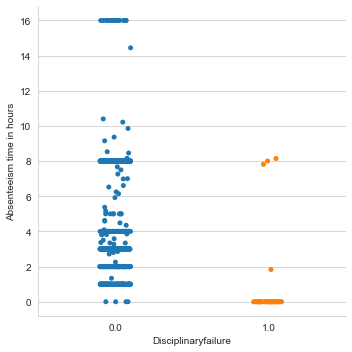

Education


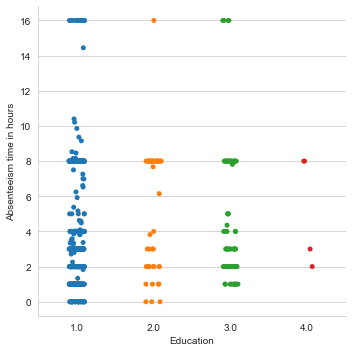

Son


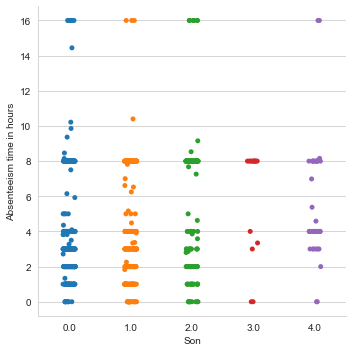

Socialdrinker


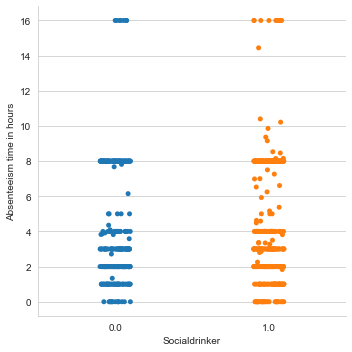

Socialsmoker


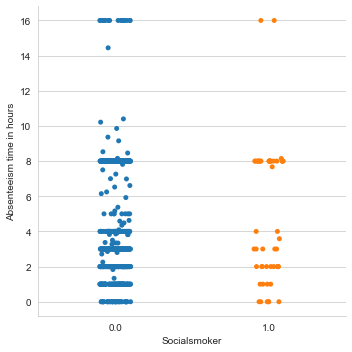

Pet


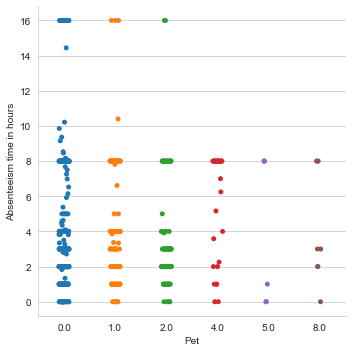

In [446]:
for i in categorical:
    print(i)
    sns.catplot(x=i, y="Absenteeismtimeinhours", data=Empdata)
    plt.xlabel(i)
    plt.ylabel('Absenteeism time in hours')
    plt.savefig('{i}_Vs_Absenteeismtimeinhours.png'.format(i=i))
    
    plt.show()

Transportationexpense


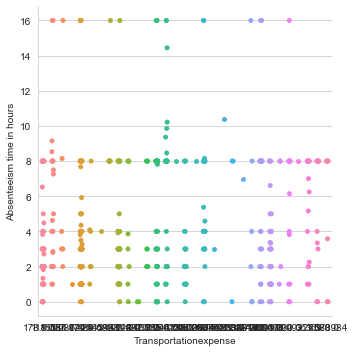

DistancefromResidencetoWork


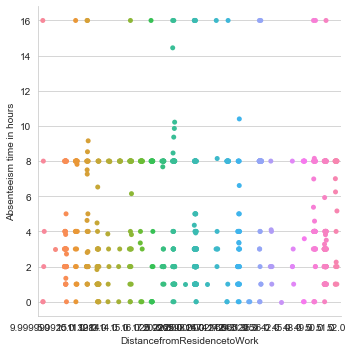

Servicetime


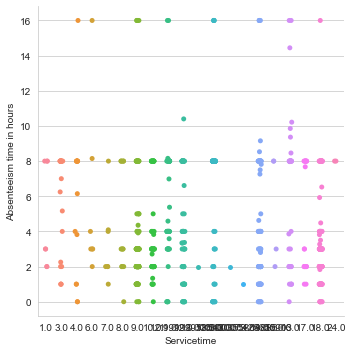

Age


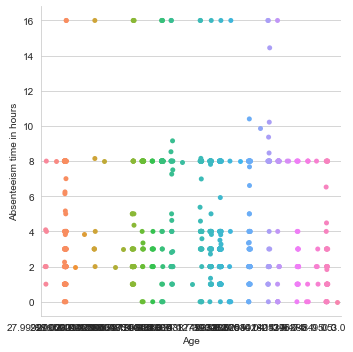

WorkloadAverageperDay


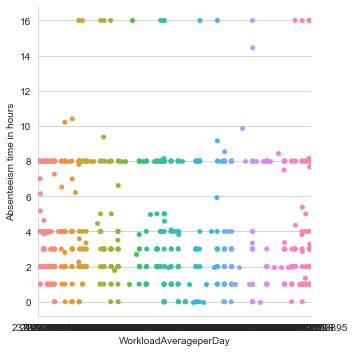

Hittarget


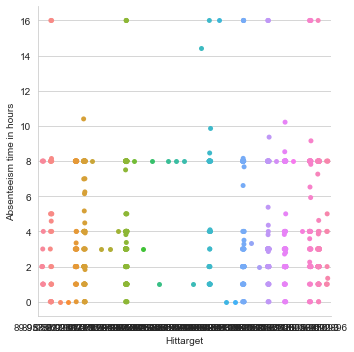

Weight


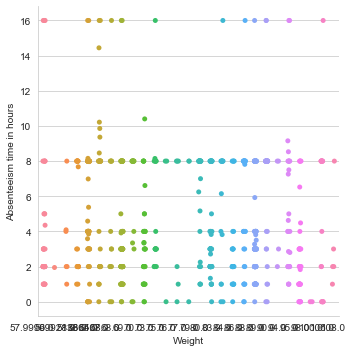

Height


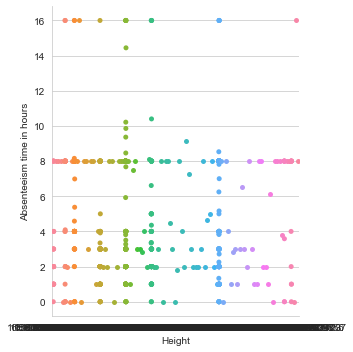

Bodymassindex


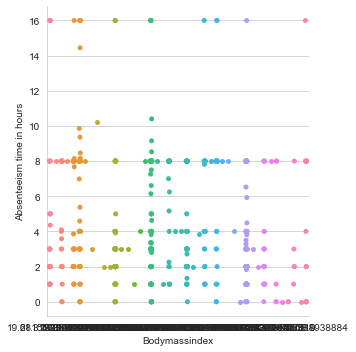

Absenteeismtimeinhours


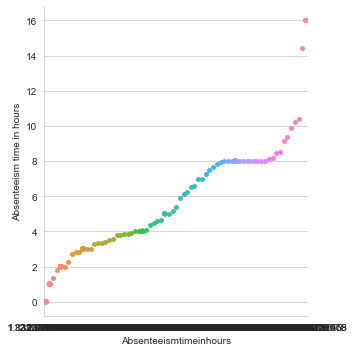

In [447]:
for i in numerical:
    print(i)
    sns.catplot(x=i, y="Absenteeismtimeinhours", data=Empdata)
    plt.xlabel(i)
    plt.ylabel('Absenteeism time in hours')
    plt.savefig('{i}_Vs_Absenteeismtimeinhours.png'.format(i=i))
    
    plt.show()

## Correlation

### Doing Chi-square test for correlation between categorical variables

In [448]:
from scipy.stats import chi2_contingency
factors_paired = [(i,j) for i in categorical for j in categorical] 
chi2, p_values =[], []
for f in factors_paired:
    if f[0] != f[1]:
        chitest = chi2_contingency(pd.crosstab(Empdata[f[0]], Empdata[f[1]]))
        chi2.append(chitest[0])
        p_values.append(chitest[1])
    else:
        chi2.append(0)
        p_values.append(0)

p1 = np.array(p_values).reshape((10,10))
p1 = pd.DataFrame(p1, index=categorical, columns=categorical)
p1

,Reasonforabsence,Monthofabsence,Dayoftheweek,Seasons,Disciplinaryfailure,Education,Son,Socialdrinker,Socialsmoker,Pet
Reasonforabsence,0.000000e+00,2.464377e-17,6.311994e-02,7.510465e-22,2.601804e-123,1.232456e-10,6.763565e-19,3.724823e-08,2.592417e-09,2.234931e-17
Monthofabsence,2.464377e-17,0.000000e+00,4.811281e-01,0.000000e+00,1.009952e-04,6.067704e-03,4.485331e-05,5.884371e-03,1.776792e-02,5.232045e-04
Dayoftheweek,6.311994e-02,4.811281e-01,0.000000e+00,1.953925e-01,3.042452e-01,5.484674e-01,2.875821e-07,6.056688e-01,8.076879e-01,4.604728e-01
Seasons,7.510465e-22,0.000000e+00,1.953925e-01,0.000000e+00,8.428010e-05,8.040298e-02,8.845548e-06,1.365297e-01,8.000933e-02,4.142335e-04
Disciplinaryfailure,2.601804e-123,1.009952e-04,3.042452e-01,8.428010e-05,0.000000e+00,3.674572e-01,5.367838e-02,2.711790e-01,3.240643e-03,3.326120e-02
Education,1.232456e-10,6.067704e-03,5.484674e-01,8.040298e-02,3.674572e-01,0.000000e+00,3.572341e-12,7.846132e-35,3.677654e-21,1.275301e-26
Son,6.763565e-19,4.485331e-05,2.875821e-07,8.845548e-06,5.367838e-02,3.572341e-12,0.000000e+00,1.473196e-09,3.488761e-22,3.774370e-89
Socialdrinker,3.724823e-08,5.884371e-03,6.056688e-01,1.365297e-01,2.711790e-01,7.846132e-35,1.473196e-09,0.000000e+00,8.492374e-03,7.353671e-27
Socialsmoker,2.592417e-09,1.776792e-02,8.076879e-01,8.000933e-02,3.240643e-03,3.677654e-21,3.488761e-22,8.492374e-03,0.000000e+00,2.014430e-20
Pet,2.234931e-17,5.232045e-04,4.604728e-01,4.142335e-04,3.326120e-02,1.275301e-26,3.774370e-89,7.353671e-27,2.014430e-20,0.000000e+00


#### Dropping Seasons since p-value of 'Seasons' versus 'Month.of.absence' is 0.00(<0.05) rejecting null hypothesis that the two variables are independent.

## Build Correlation Plot for Numerical variables

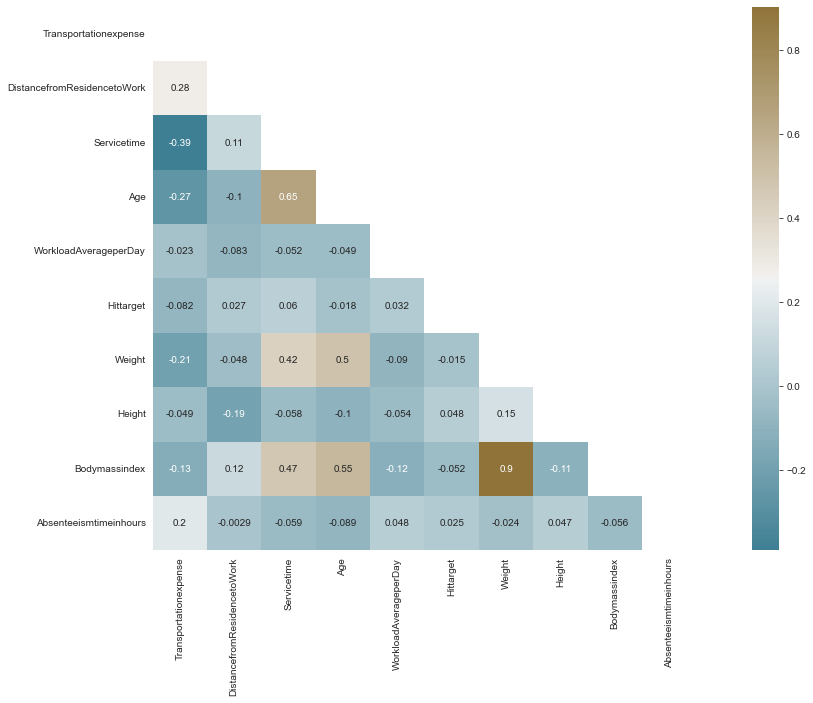

In [449]:
Empdata_corr=Empdata.loc[:,numerical]
f, ax = plt.subplots(figsize=(20, 10))
correlation = Empdata_corr.corr()

mask=np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

sns.heatmap(correlation, mask=mask,
            cmap=sns.diverging_palette(220, 60, as_cmap=True),
            square=True, ax=ax, annot = True)
plt.plot()
plt.show()

#### Weight and Bodymassindex have correlation coeff. of 0.9 so we will drop Weight from the data.

## ANOVA Test

In [450]:
from statsmodels import *
from statsmodels.formula.api import ols
from scipy import *
from statsmodels.stats.anova import anova_lm

In [451]:
formula = 'Absenteeismtimeinhours ~ C(Seasons)+C(Monthofabsence)+C(Pet)+C(Son)+C(Socialdrinker)+C(Reasonforabsence)+C(Dayoftheweek)+C(Disciplinaryfailure)+C(Education)+C(Socialsmoker)'

In [452]:
#anova for categorical data
model = ols(formula, data=Empdata).fit()
aov_table = anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(Seasons),37.648812,3.0,1.812171,1.435738e-01
C(Monthofabsence),85.352996,11.0,1.120457,3.418676e-01
C(Pet),61.877766,5.0,1.787038,1.132650e-01
C(Son),111.927376,4.0,4.040597,3.023878e-03
C(Socialdrinker),64.040599,1.0,9.247505,2.448953e-03
C(Reasonforabsence),2338.928456,27.0,12.508994,1.073539e-43
C(Dayoftheweek),15.194311,4.0,0.548517,7.001729e-01
C(Disciplinaryfailure),6.123839,1.0,0.884287,3.473647e-01
C(Education),38.709719,3.0,1.863236,1.344578e-01
C(Socialsmoker),0.511332,1.0,0.073837,7.859130e-01


In [453]:
# p value greater than 0.05 are for 
# Socialsmoker


In [454]:
Empdata = Empdata.drop(["Education","Seasons","Pet","Socialsmoker","Weight","Monthofabsence"],axis=1)
numerical=['Transportationexpense','DistancefromResidencetoWork','Servicetime','Age','WorkloadAverageperDay','Hittarget',
     'Bodymassindex','Absenteeismtimeinhours','Height']

categorical=['Reasonforabsence','Dayoftheweek','Son','Disciplinaryfailure','Socialdrinker']

## Feature Scaling

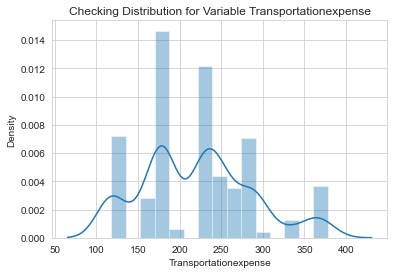

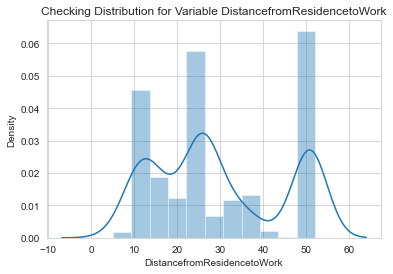

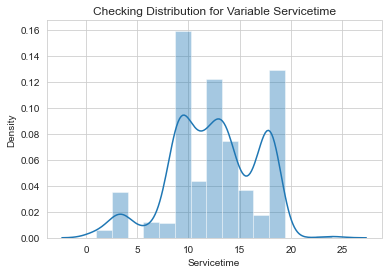

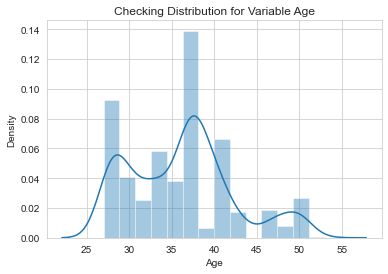

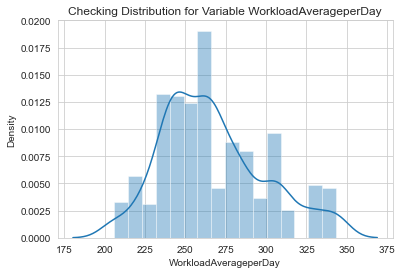

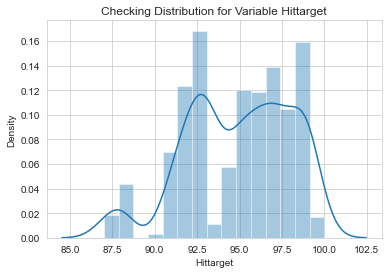

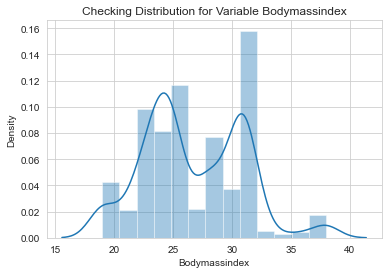

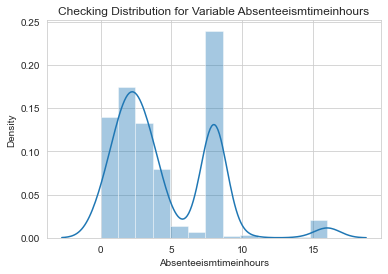

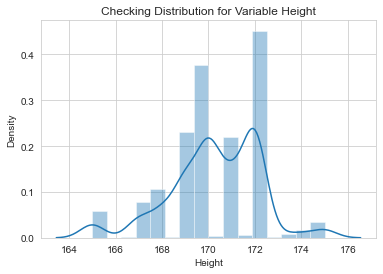

In [455]:
#First Check distribution of Data

for i in numerical:
    if i == 'Absenteeism time in hours':
        continue
    sns.distplot(Empdata[i],bins = 'auto')
    plt.title("Checking Distribution for Variable "+str(i))
    plt.ylabel("Density")
    plt.savefig('{i}_Vs_Density.png'.format(i=i))
    plt.show()

In [456]:
#since skewness of target variable is high, apply log transform to reduce the skewness-
Empdata['Absenteeismtimeinhours'] = np.log1p(Empdata['Absenteeismtimeinhours'])

In [457]:
#Normalization
for i in numerical:
    print(i)
    Empdata[i] = (Empdata[i] - min(Empdata[i]))/(max(Empdata[i]) - min(Empdata[i]))

Transportationexpense
DistancefromResidencetoWork
Servicetime
Age
WorkloadAverageperDay
Hittarget
Bodymassindex
Absenteeismtimeinhours
Height


In [458]:
Empdata.describe()

,Reasonforabsence,Dayoftheweek,Transportationexpense,DistancefromResidencetoWork,Servicetime,Age,WorkloadAverageperDay,Hittarget,Disciplinaryfailure,Son,Socialdrinker,Height,Bodymassindex,Absenteeismtimeinhours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,19.204054,3.914865,0.394832,0.524066,0.497650,0.351893,0.443972,0.608543,0.052703,1.009459,0.568919,0.526764,0.404599,0.525339
std,8.423836,1.421675,0.254271,0.315676,0.181293,0.235029,0.233210,0.237602,0.223590,1.094292,0.495562,0.194085,0.225250,0.232853
min,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,3.000000,0.234615,0.234043,0.347826,0.153846,0.280116,0.461538,0.000000,0.000000,0.000000,0.400000,0.263158,0.387762
50%,23.000000,4.000000,0.411538,0.446809,0.521739,0.384615,0.424739,0.615385,0.000000,1.000000,1.000000,0.500000,0.315789,0.489301
75%,26.000000,5.000000,0.546154,0.957447,0.652174,0.500000,0.574766,0.769231,0.000000,2.000000,1.000000,0.699999,0.631579,0.775524
max,28.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000


## Modelling

In [459]:
Empdata = pd.get_dummies(Empdata,columns=categorical,drop_first=True)

X= Empdata.drop(['Absenteeismtimeinhours'],axis=1)
Y= Empdata['Absenteeismtimeinhours']
print(X)
#Divide data into train and test-
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=.25)

     Transportationexpense  DistancefromResidencetoWork  Servicetime  \
0                 0.657692                     0.659574     0.521739   
1                 0.000000                     0.170213     0.739130   
2                 0.234615                     0.978723     0.739130   
3                 0.619231                     0.000000     0.565217   
4                 0.657692                     0.659574     0.521739   
..                     ...                          ...          ...   
735               0.657692                     0.659574     0.521739   
736               0.450000                     0.127660     0.565217   
737               0.000000                     0.191489     0.521739   
738               0.434615                     0.638298     0.565217   
739               0.234615                     0.851064     0.565217   

          Age  WorkloadAverageperDay  Hittarget    Height  Bodymassindex  \
0    0.230769               0.244925   0.769231  0.699999  

In [460]:
Y

0      0.568061
1      0.000000
2      0.387762
3      0.568061
4      0.387762
         ...   
735    0.775524
736    0.568061
737    0.000000
738    0.000000
739    0.000000
Name: Absenteeismtimeinhours, Length: 740, dtype: float64

In [461]:
def Mean_sq_error(actual,predicted):
    mse=mean_squared_error(actual,predicted)
    return mse

In [462]:
def Rootmean_sq_error(actual,predicted):
    rmse = np.sqrt(mean_squared_error(actual,predicted))
    return rmse

## Decision Tree

In [463]:
model_dt = DecisionTreeRegressor(random_state = 0).fit(X_train,Y_train)

model_dt

DecisionTreeRegressor(random_state=0)

In [464]:
predict_dt = model_dt.predict(X_test)
predict_dt = pd.DataFrame(predict_dt)

In [465]:
mse_dt=Mean_sq_error(Y_test,predict_dt)
rmse_dt=Rootmean_sq_error(Y_test,predict_dt)
r2_dt=r2_score(Y_test,predict_dt)

print(rmse_dt,mse_dt,r2_dt)

0.20252081002253827 0.041014678492185035 0.13755912426465655


In [466]:
## RMSE : 0.21841953548653512 
## MSE:   0.047707093482153774  
## R2 Score :  0.06331814740438069

## Random Forest

In [467]:
model_rf=RandomForestRegressor(n_estimators=300,random_state=0).fit(X_train,Y_train)
model_rf

RandomForestRegressor(n_estimators=300, random_state=0)

In [468]:
predict_rf=model_rf.predict(X_test)
rmse_rf=Rootmean_sq_error(Y_test,predict_rf)


mse_rf=Mean_sq_error(Y_test,predict_rf)


r2_rf=r2_score(Y_test,predict_rf)
print(rmse_rf,mse_rf,r2_rf)

0.164538771123446 0.027073007202813748 0.4307192229915233


In [469]:
## RMSE:   0.1580986839011471 
## MSE:      0.02499519385127482 
## R2 Score:   0.5362384095575559

In [470]:
model_rf.feature_importances_

array([8.05176900e-02, 2.59577340e-02, 2.12507690e-02, 3.13840322e-02,
       8.19329505e-02, 5.84122899e-02, 4.15167556e-02, 5.86858091e-02,
       4.94661336e-03, 5.87596488e-04, 0.00000000e+00, 1.60010414e-03,
       1.45323886e-03, 1.74424480e-03, 2.36910635e-03, 9.87213076e-04,
       3.66173912e-03, 6.31642138e-03, 1.34903885e-02, 5.72223314e-03,
       1.18320502e-02, 3.97359689e-03, 6.09235603e-05, 1.94883647e-03,
       1.71913837e-04, 9.51027818e-03, 6.13248417e-03, 2.82126420e-03,
       6.36143774e-03, 6.74449745e-02, 7.92444771e-06, 1.49263694e-02,
       2.84821975e-03, 2.25319546e-02, 6.73753886e-02, 1.30837912e-02,
       1.37890742e-02, 1.89458803e-02, 1.38367367e-02, 6.88340022e-03,
       1.49895490e-02, 2.00405527e-03, 1.39623968e-03, 2.39712788e-01,
       1.48739391e-02])

## Linear Regression

In [472]:
from sklearn.linear_model import LinearRegression
model_lr=LinearRegression().fit(X_train,Y_train)

In [473]:
predict_lr=model_lr.predict(X_test)

In [474]:
rmse_lr=Rootmean_sq_error(Y_test,predict_lr)


mse_lr=Mean_sq_error(Y_test,predict_lr)


r2_lr=r2_score(Y_test,predict_lr)
print(rmse_lr,mse_lr,r2_lr)

0.15483743887671578 0.023974632477900694 0.49587065436552336


In [ ]:
##  RMSE:  0.14676965958612717 
## MSE :    0.02154133297502765
## R2 Score:   0.6003214497878532